<a href="https://colab.research.google.com/github/MoreenMarutaData/Supervised-Learning---Decision-Trees-and-Support-Vector-Machines/blob/main/HYPERTHYROID_PROBABILITY_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DEFINE THE QUESTION

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## METRIC FOR SUCCESS

To find the best model that analyses symptoms and predicts the probability of a human having hypothyroid infection.

##UNDERSTANDING THE CONTEXT

There are various models used in machine learning. Depending on the features, accuracy, RMSE, R Score and MSE, a good classifier model should be choosen, so it is easier to predict the probability of a patient having hypothyrid complications.

## EXPERIMENTAL DESIGN

Reading the Data

PrepaRing and cleaning the Data

Exploratory Data Analysis

Then modelling using the following approaches:

* Approach 0: Random forest Regressor
* Approach 1: Random forest classifier
* Approach 2: Ada boost
* Approach 3: Gradient boost
* Approach 4: SVM - linear
* Approach 5: SVM - Radial Basis Function
* Approach 6: SVM - polynomial

## LIBRARIES

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

## READING AND CHECKING DATA

In [59]:
df=pd.read_csv('/content/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [60]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


Dataset Columns
* Status
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medication
* thyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4
* T4U_measured	
* T4U	FTI_measured	
* FTI	
* TBG_measured	
* TBG

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [62]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [63]:
df.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [64]:
df.duplicated().sum()

77

## CLEANING DATA

In [65]:
df=df.drop_duplicates(keep=False)
df.duplicated().sum()

0

In [66]:
df.shape

(3010, 26)

In [67]:
# Get unique values for each column
column_names = df.columns.to_list()

for col in column_names:
  print(f'Column: {col} \n')
  print(df[col].unique())
  print(' \n \n')

Column: status 

['hypothyroid' 'negative']
 
 

Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '75' '53' '59' '68' '50' '65'
 '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60' '34' '79'
 '62' '74' '32' '41' '70' '29' '5' '69' '58' '35' '51' '22' '16' '44' '39'
 '78' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '61' '49' '26' '57' '31' '90' '81' '25' '37' '76'
 '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9' '12'
 '10' '8' '7' '4' '93']
 
 

Column: sex 

['M' 'F' '?']
 
 

Column: on_thyroxine 

['f' 't']
 
 

Column: query_on_thyroxine 

['f' 't']
 
 

Column: on_antithyroid_medication 

['f' 't']
 
 

Column: thyroid_surgery 

['f' 't']
 
 

Column: query_hypothyroid 

['f' 't']
 
 

Column: query_hyperthyroid 

['f' 't']
 
 

Column: pregnant 

['f' 't']
 
 

Column: sick 

['f' 't']
 
 

Column: tumor 

['f' 't']
 
 

Column: lithium 

['f' 't']
 
 

Column: goitre 

['f' 't']
 
 

Column: TSH_measur

The sex column has a unique value '?' so lets replace it with 'other'

In [68]:
df['sex'].replace({'?': 'other'},inplace=True)
df['sex'].unique()

array(['M', 'F', 'other'], dtype=object)

some other columns also have '?', lets replace it with null values then zeros so we cannot lose the data

In [69]:
df.replace('?', np.nan, inplace=True)

In [70]:
df=df.fillna(0)

In [71]:
column_names = df.columns.to_list()

for col in column_names:
  print(f'Column: {col} \n')
  print(df[col].unique())
  print(' \n \n')

Column: status 

['hypothyroid' 'negative']
 
 

Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '75' '53' '59' '68' '50' '65'
 '28' '43' '40' '84' 0 '83' '63' '73' '36' '27' '48' '71' '60' '34' '79'
 '62' '74' '32' '41' '70' '29' '5' '69' '58' '35' '51' '22' '16' '44' '39'
 '78' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '61' '49' '26' '57' '31' '90' '81' '25' '37' '76'
 '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9' '12'
 '10' '8' '7' '4' '93']
 
 

Column: sex 

['M' 'F' 'other']
 
 

Column: on_thyroxine 

['f' 't']
 
 

Column: query_on_thyroxine 

['f' 't']
 
 

Column: on_antithyroid_medication 

['f' 't']
 
 

Column: thyroid_surgery 

['f' 't']
 
 

Column: query_hypothyroid 

['f' 't']
 
 

Column: query_hyperthyroid 

['f' 't']
 
 

Column: pregnant 

['f' 't']
 
 

Column: sick 

['f' 't']
 
 

Column: tumor 

['f' 't']
 
 

Column: lithium 

['f' 't']
 
 

Column: goitre 

['f' 't']
 
 

Column: TSH_meas

check for missing values

In [72]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

TBG                          0.0
TBG_measured                 0.0
age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
pregnant                     0.0
sick                         0.0
tumor                        0.0
lithium                      0.0
goitre                       0.0
TSH_measured                 0.0
TSH                          0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
FTI                          0.0
status                       0.0
dtype: float64

Some numerical columns are  identified as object so lets change their data types and check to ensure we can see the changes

In [73]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0


In [74]:
# df['age','TSH','T3','TT4','T4U','FTI','TBG']=pd.to_numeric(df['age','TSH','T3','TT4','T4U','FTI','TBG'], downcast='float')
num=['age','TSH','T3','TT4','T4U','FTI','TBG']
#df[num] = df[num].astype(np.float64)

for col in df.columns:
  if col in num:
    df[col]= pd.to_numeric(df[col])
  
  else:
    df[col] = df[col].astype('category')

In [75]:
df.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

checking for outliers. 

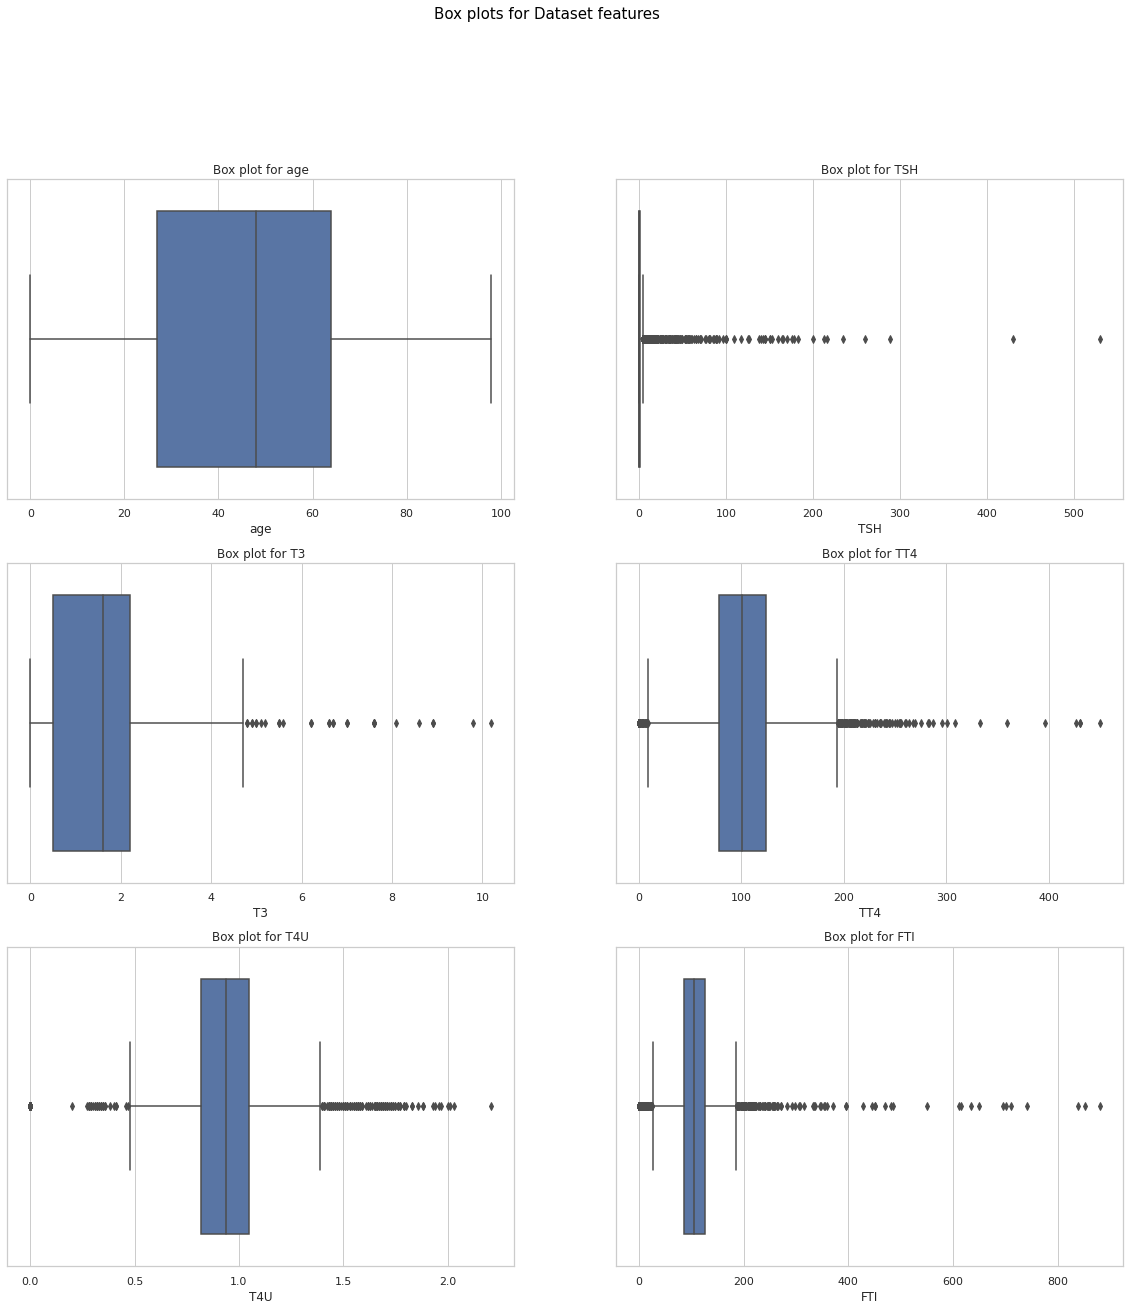

In [76]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
# label the title
fig.suptitle('Box plots for Dataset features', y= 1, color = 'black', fontsize = 15)
sns.set(style = 'whitegrid', context = 'notebook')
# Use a for loop to iterate through our num list
for ax, data, name in zip(axes.flatten(), df, num):
  sns.boxplot(df[name], ax = ax)
  ax.set_title('Box plot for '+ name)  
plt.show()

There is a lot of outliers except for the age column. Although outliers affect analysis, this is for medical purposes and removing a lot of data might negate our results.

## EDA

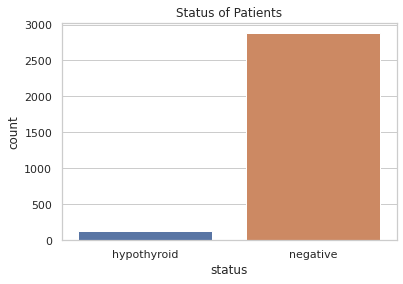

In [103]:
sns.countplot(x='status',data=df)
plt.title('Status of Patients')
plt.show()

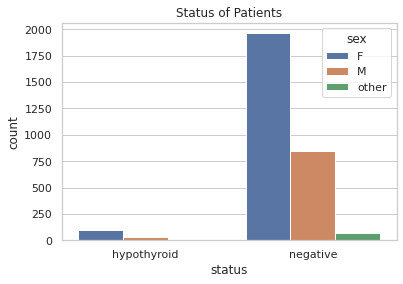

In [105]:

sns.countplot(x='status', hue= "sex",data=df)
plt.title('Status of Patients')
plt.show()

Text(0.5, 1.0, 'Status of Patients with tumor')

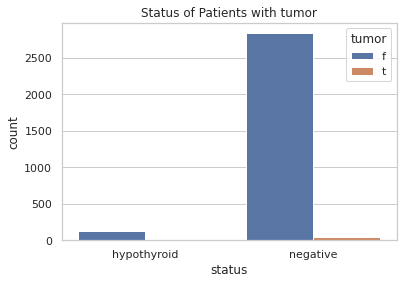

In [106]:
sns.countplot(x='status', hue= "tumor",data=df)
plt.title('Status of Patients with tumor')

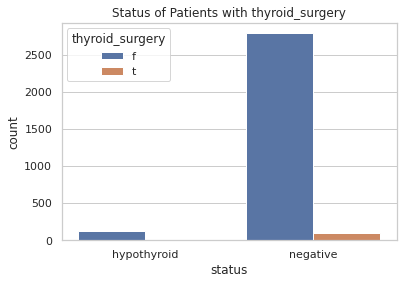

In [107]:
sns.countplot(x='status', hue= "thyroid_surgery",data=df)
plt.title('Status of Patients with thyroid_surgery')
plt.show()

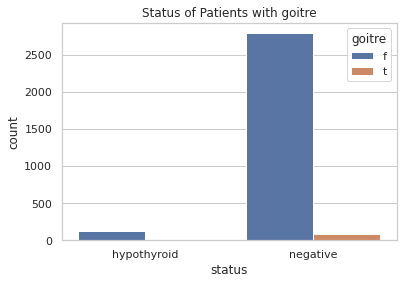

In [109]:
sns.countplot(x='status', hue= "goitre",data=df)
plt.title('Status of Patients with goitre')
plt.show()

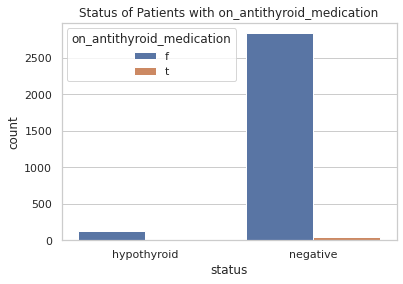

In [111]:

sns.countplot(x='status', hue= "on_antithyroid_medication",data=df)
plt.title('Status of Patients with on_antithyroid_medication')
plt.show()

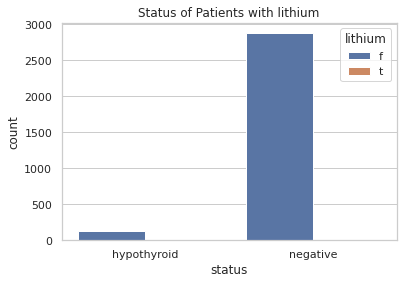

In [113]:

sns.countplot(x='status', hue= "lithium",data=df)
plt.title('Status of Patients with lithium')
plt.show()

In [114]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

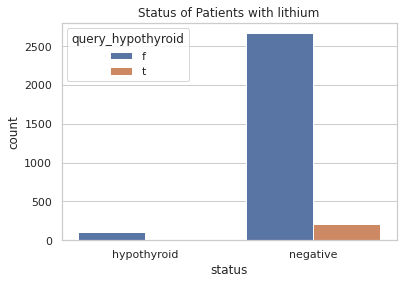

In [117]:

sns.countplot(x='status', hue= "query_hypothyroid",data=df)
plt.title('Status of Patients with lithium')
plt.show()

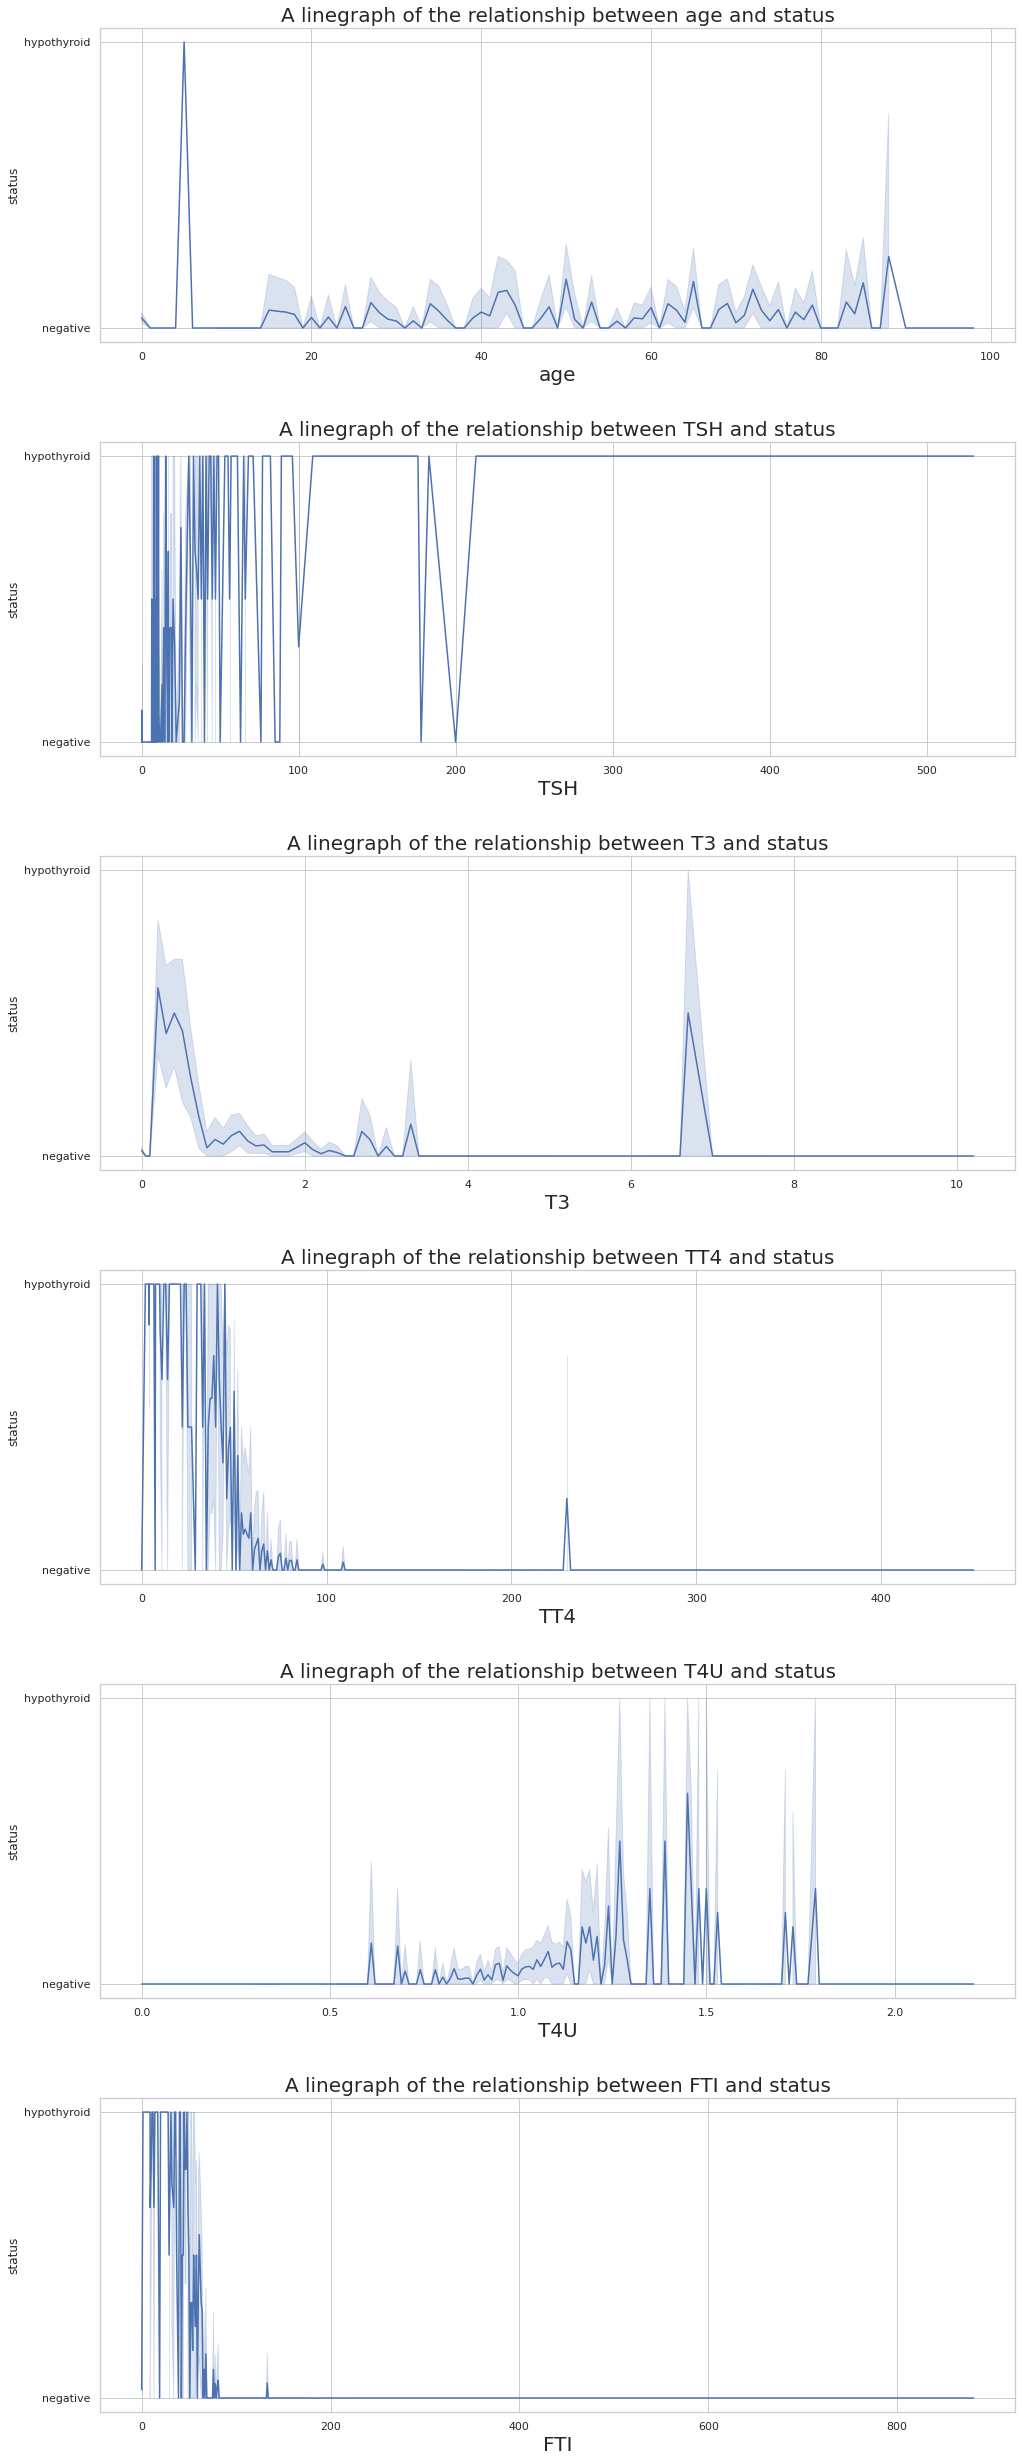

In [101]:

col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(len(col_names), figsize = (15,35))
for i, col_val in enumerate(col_names):

    sns.lineplot(x = df[col_val], y=df['status'], ax=ax[i])
    ax[i].set_title('A linegraph of the relationship between {} and status'.format(col_val), fontsize=20)
    ax[i].set_xlabel(col_val, fontsize=20)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

In [128]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [132]:
numerical=df[['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']]
numerical.corr()

,TSH,T3,TT4,T4U,FTI,TBG
TSH,1.000000,-0.081673,-0.218883,0.097115,-0.180942,-0.048415
T3,-0.081673,1.000000,0.484401,0.454906,0.316207,-0.299149
TT4,-0.218883,0.484401,1.000000,0.602693,0.752729,-0.442567
T4U,0.097115,0.454906,0.602693,1.000000,0.188322,-0.608245
FTI,-0.180942,0.316207,0.752729,0.188322,1.000000,-0.381683
TBG,-0.048415,-0.299149,-0.442567,-0.608245,-0.381683,1.000000


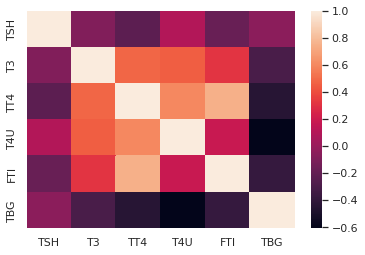

In [133]:
sns.heatmap(numerical.corr())

The features have very low correlations

## MODELLING

### PREPROCESSING

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
hp=df.apply(LabelEncoder().fit_transform)

On the sex column, 1 is male, 0 is female and 2 is other. The columns that had 't' and 'f', f is o and t is 1. The columns that had 'y' and 'n', y is 1 and n is 0.

In [80]:
hp.dtypes

status                       int64
age                          int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
TSH                          int64
T3_measured                  int64
T3                           int64
TT4_measured                 int64
TT4                          int64
T4U_measured                 int64
T4U                          int64
FTI_measured                 int64
FTI                          int64
TBG_measured                 int64
TBG                          int64
dtype: object

Since we are building tree based algorithms, we will not sale our features.

### PART 1 DECISION TREES

RANDOM FOREST

lets use a forest regressor

In [81]:
# lets assign the dependent and independent variables

y = hp['status']

features = hp.columns.to_list()
features.remove('status')

X = hp[features]

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, random_state=50,max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()


,Actual,Predicted
count,903.000000,903.000000
mean,0.965670,0.966143
std,0.182176,0.162222
min,0.000000,0.013586
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


lets check the errors

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013859639284441096
Mean Squared Error: 0.007435760602998243
Root Mean Squared Error: 0.08623085644360864


This looks a bit overfitted, which means our test model is performing very well.

plotting the random forest

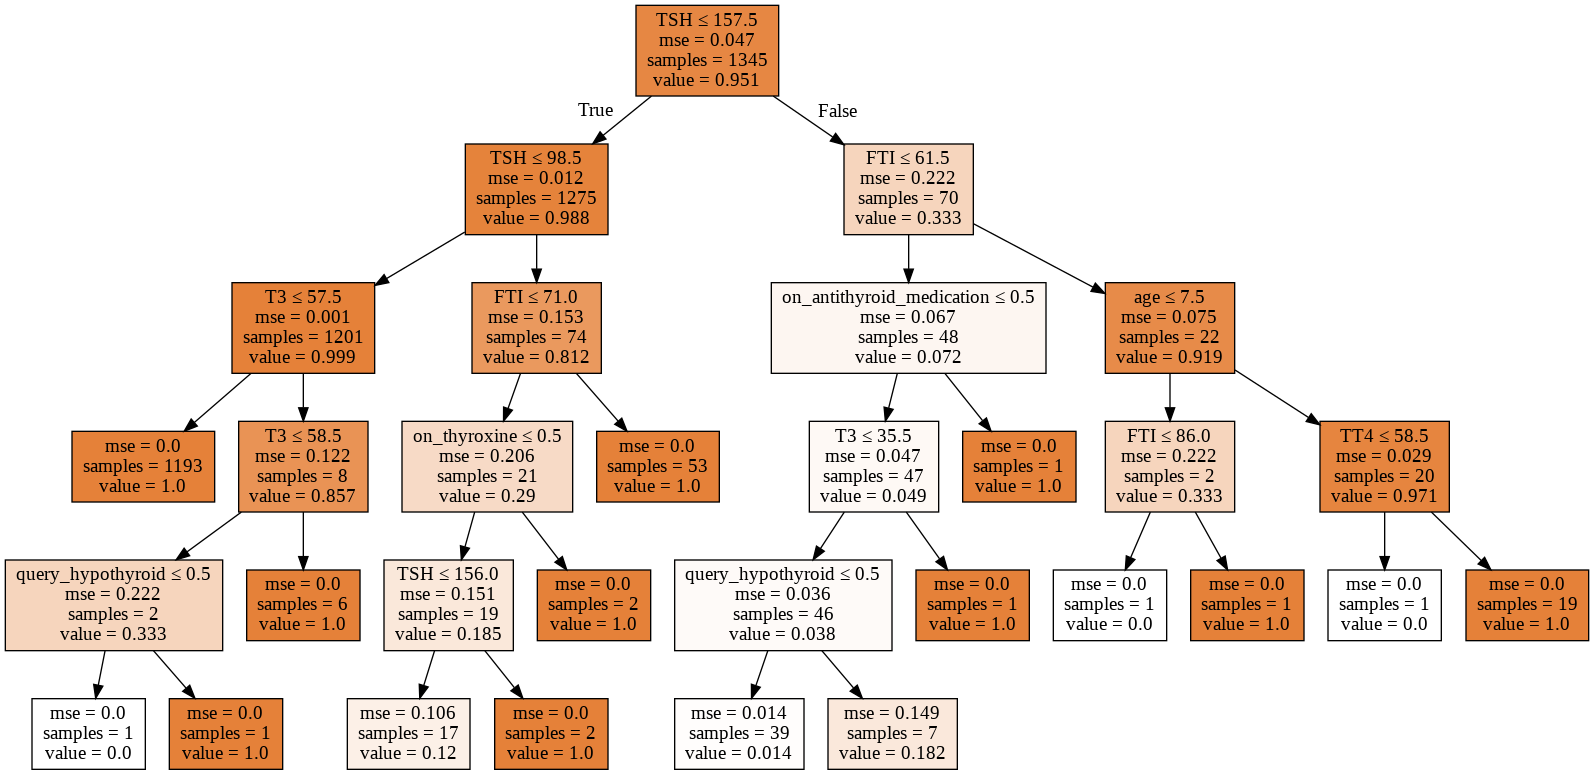

In [83]:
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = False,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

Feature importance shows us the most relevant features. We could challenge the solution by using the necessary relevant features and observe our findings.

Text(0.5, 1.0, 'Feature importance')

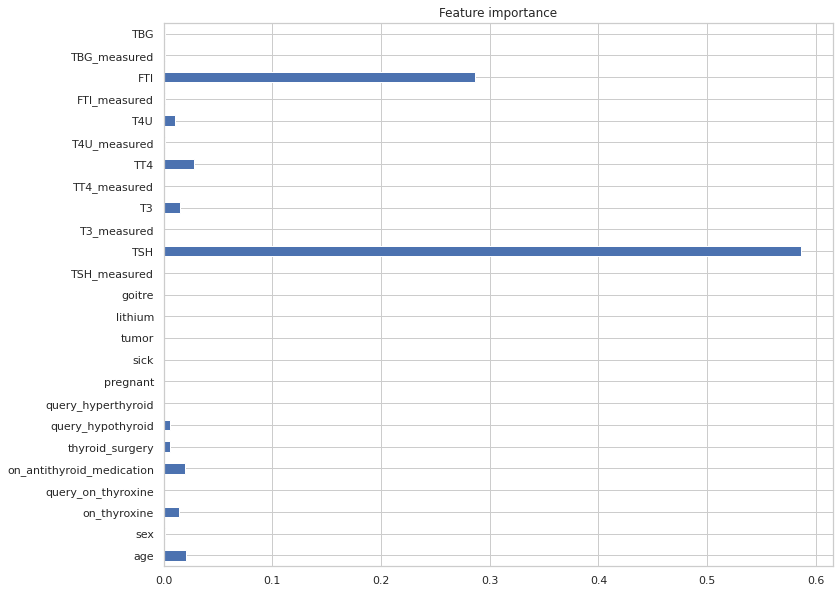

In [84]:
feature_importance=pd.Series(forest.feature_importances_,index=features)
plt.figure(figsize=(12, 10))
feature_importance.plot(kind='barh')
plt.title('Feature importance')

lets use a classifier and observe the findings

           Actual   Predicted
count  903.000000  903.000000
mean     0.965670    0.972315
std      0.182176    0.164161
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


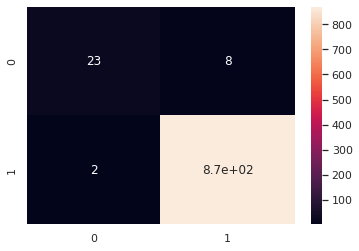

In [85]:
y = hp['status']

features = hp.columns.to_list()
features.remove('status')

X = hp[features]

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=50,max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# Plot confusion matrix
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[0,1], columns=[0,1])
sns.heatmap(matrix, annot=True)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_frame.describe())


In [86]:
print(confusion_matrix(y_test, y_pred))
print( 'Accuracy Score =',accuracy_score(y_test, y_pred))

[[ 23   8]
 [  2 870]]
Accuracy Score = 0.9889258028792912


This a better accuracy score

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01107419712070875
Mean Squared Error: 0.01107419712070875
Root Mean Squared Error: 0.10523401123547818


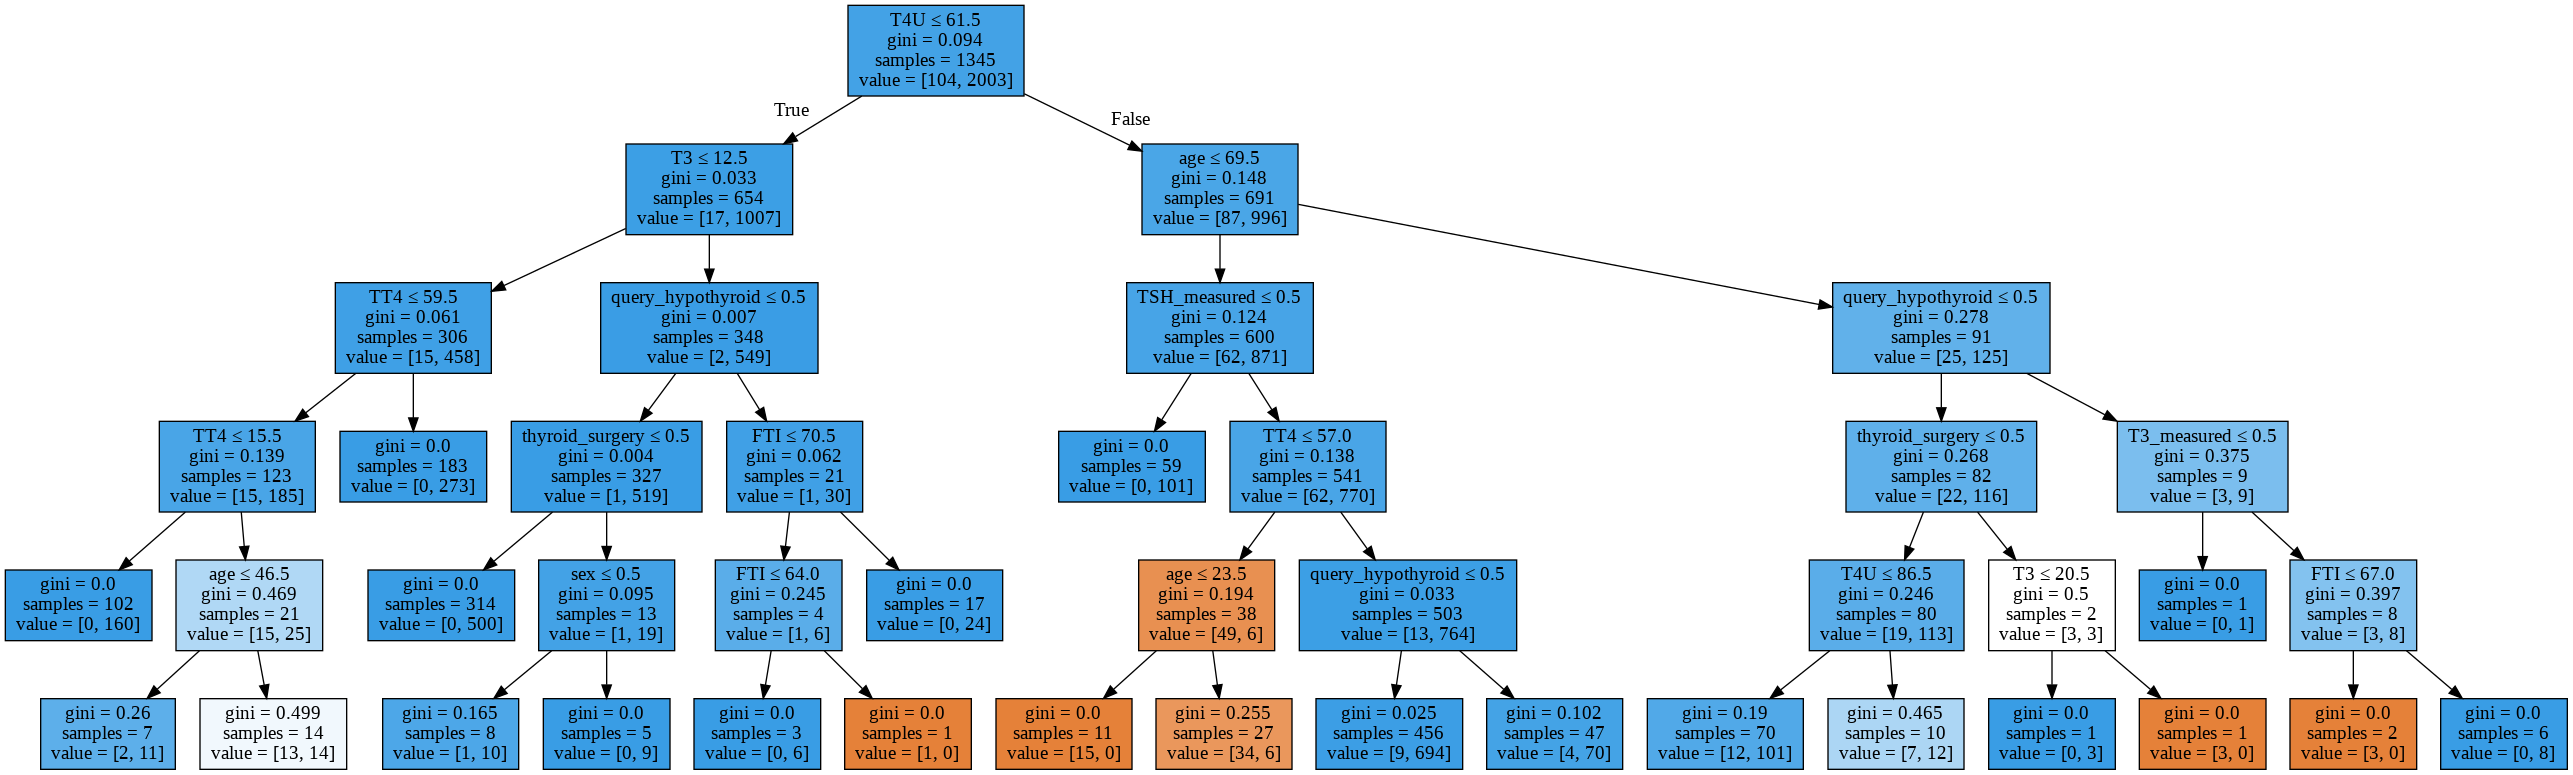

In [88]:
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = False,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

Text(0.5, 1.0, 'Feature Importance')

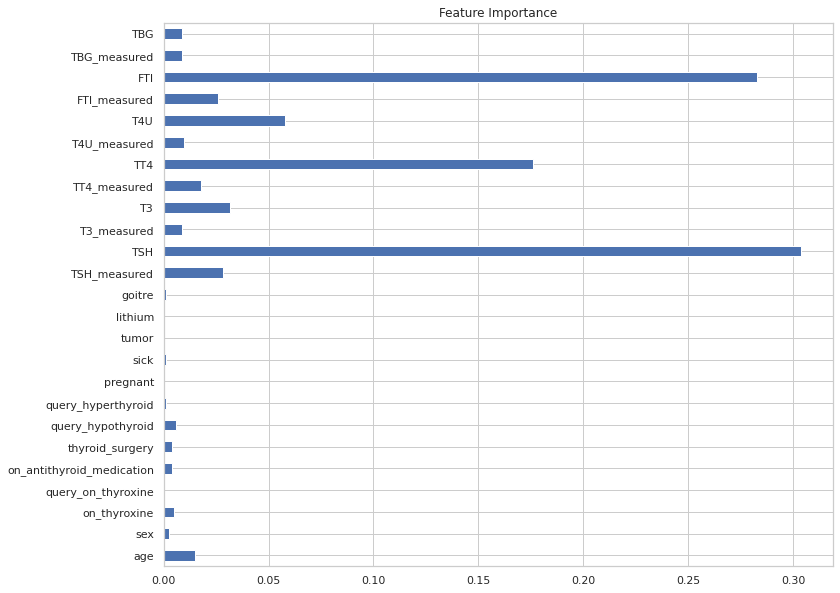

In [89]:

feature_importance=pd.Series(forest.feature_importances_,index=features)
plt.figure(figsize=(12, 10))
feature_importance.plot(kind='barh')
plt.title('Feature Importance')

lets print feature importances in a descending order

In [90]:
random_forest_features = pd.DataFrame({'Features': X.columns.to_list(), 'Importance':feature_importance })
random_forest_features.sort_values('Importance', ascending=False)

,Features,Importance
TSH,TSH,0.304013
FTI,FTI,0.282735
TT4,TT4,0.175986
T4U,T4U,0.057934
T3,T3,0.031600
TSH_measured,TSH_measured,0.028452
FTI_measured,FTI_measured,0.026075
TT4_measured,TT4_measured,0.017887
age,age,0.014723
T4U_measured,T4U_measured,0.009730


ADA BOOSTING

In [123]:

from sklearn.ensemble import AdaBoostClassifier

# create our classifier with 200 trees of depth 1
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200)

# fitting our model to our training data
ada.fit(X_train, y_train)

# making predictions
ada_y_pred = ada.predict(X_test)

# compare actual values to predicted values
ada_compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : ada_y_pred})

# preview our summary statistics
ada_compare.describe()

,Actual,Predicted
count,903.000000,903.000000
mean,0.965670,0.961240
std,0.182176,0.193129
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_y_pred)))

Mean Absolute Error: 0.013289036544850499
Mean Squared Error: 0.013289036544850499
Root Mean Squared Error: 0.115278083540847


In [125]:
print(confusion_matrix(y_test, ada_y_pred))
print( 'Accuracy Score =',accuracy_score(y_test, ada_y_pred))

[[ 27   4]
 [  8 864]]
Accuracy Score = 0.9867109634551495


the accuracy score has reduced a bit.

GRADIENT BOOSTING

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 100

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=1)
gbr = gbr.fit(X_train, y_train)

# predict using the model
y_pred_gbr = gbr.predict(X_test)


# compare actual values to predicted values
comparison = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_gbr})
comparison

,Actual,Predicted
1929,1,1
392,1,1
1259,1,1
2364,1,1
2664,1,1
...,...,...
1878,1,1
2918,1,1
2441,1,1
390,1,1


In [95]:
# check the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.007751937984496124
Mean Squared Error: 0.007751937984496124
Root Mean Squared Error: 0.08804509063256238


In [96]:
print(confusion_matrix(y_test, y_pred_gbr))
print( 'Accuracy Score =',accuracy_score(y_test, y_pred_gbr))

[[ 25   6]
 [  1 871]]
Accuracy Score = 0.9922480620155039


Gradient boosted trees have a higher accuracy than ada boosted trees and random forest classified trees for this dataset.

Text(0.5, 1.0, 'Feature Importance')

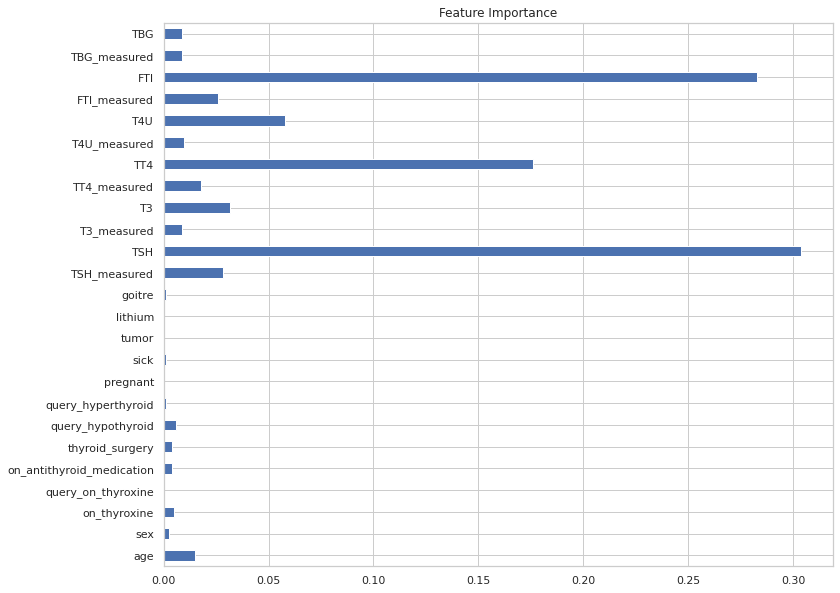

In [97]:
feature_importance=pd.Series(forest.feature_importances_,index=features)
plt.figure(figsize=(12, 10))
feature_importance.plot(kind='barh')
plt.title('Feature Importance')

### PART 2 SUPPORT VECTOR MACHINES

From boosting our models, the best features are FTI and TSH. Both compound for over 50% of the reuslts.

In [98]:

X= hp[['FTI','TSH']]
y=hp['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lets plot both of them to see how they compare

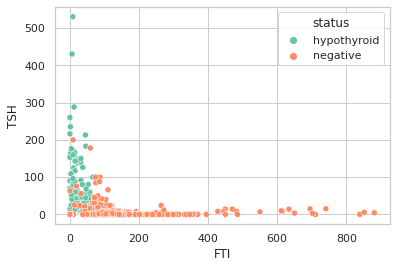

In [99]:
sns.scatterplot('FTI','TSH', data=df, hue='status', palette='Set2')
plt.show()

LINEAR KERNEL MODEL

In [57]:
# Build the svm model 
model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)
# Predict the response for the test set
y_pred_l = model.predict(X_test)

# check the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

print(confusion_matrix(y_test, y_pred_l))
print( 'Accuracy Score =',accuracy_score(y_test, y_pred_l))
print(classification_report(y_test,y_pred_l))

Mean Absolute Error: 0.01107419712070875
Mean Squared Error: 0.01107419712070875
Root Mean Squared Error: 0.10523401123547818
[[ 24   7]
 [  3 869]]
Accuracy Score = 0.9889258028792912
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.99      1.00      0.99       872

    accuracy                           0.99       903
   macro avg       0.94      0.89      0.91       903
weighted avg       0.99      0.99      0.99       903



RBF

In [100]:

rbf = SVC(kernel = 'rbf', gamma = 'auto')

# train the model
rbf.fit(X_train, y_train)

# make the prediction
rbf_y_pred = rbf.predict(X_test)

#check the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rbf_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rbf_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rbf_y_pred)))

print(confusion_matrix(y_test, rbf_y_pred))
print( 'Accuracy Score =',accuracy_score(y_test, rbf_y_pred))
print(classification_report(y_test,rbf_y_pred))

Mean Absolute Error: 0.03322259136212625
Mean Squared Error: 0.03322259136212625
Root Mean Squared Error: 0.1822706541441223
[[  2  29]
 [  1 871]]
Accuracy Score = 0.9667774086378738
              precision    recall  f1-score   support

           0       0.67      0.06      0.12        31
           1       0.97      1.00      0.98       872

    accuracy                           0.97       903
   macro avg       0.82      0.53      0.55       903
weighted avg       0.96      0.97      0.95       903



POLYNOMIAL

In [56]:

poly = SVC(kernel = 'poly', gamma = 'auto')

# train the model
poly.fit(X_train, y_train)

# make the prediction
poly_y_pred = poly.predict(X_test)

#check the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_y_pred)))

print(confusion_matrix(y_test, poly_y_pred))
print( 'Accuracy Score =',accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test,poly_y_pred))

Mean Absolute Error: 0.01107419712070875
Mean Squared Error: 0.01107419712070875
Root Mean Squared Error: 0.10523401123547818
[[ 24   7]
 [  3 869]]
Accuracy Score = 0.9889258028792912
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.99      1.00      0.99       872

    accuracy                           0.99       903
   macro avg       0.94      0.89      0.91       903
weighted avg       0.99      0.99      0.99       903



Poly was the slowest perfoming kernel. RBF had the least accuracy score. Linear ad Poly kernels have high accuracy scores.

RECOMMENDATIONS.

I could have done some PCA to improve my results.

the dataset is imbalanced meaning f1 score would be the best predictor for this case.

now lets use the linear kernel for the whole dataset and observe

In [127]:
y = hp['status']

features = hp.columns.to_list()
features.remove('status')

X = hp[features]

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build the svm model 
model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)
# Predict the response for the test set
y_pred_l = model.predict(X_test)


# compare actual values to predicted values
comparison = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_l})
comparison

# check the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

print(confusion_matrix(y_test, y_pred_l))
print( 'Accuracy Score =',accuracy_score(y_test, y_pred_l))
print(classification_report(y_test,y_pred_l))



Mean Absolute Error: 0.012181616832779624
Mean Squared Error: 0.012181616832779624
Root Mean Squared Error: 0.11037036211220666
[[ 22   9]
 [  2 870]]
Accuracy Score = 0.9878183831672204
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.99      1.00      0.99       872

    accuracy                           0.99       903
   macro avg       0.95      0.85      0.90       903
weighted avg       0.99      0.99      0.99       903



the accuracy is lower by 0.001 but still performs well. f1 scores are great too.